In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
df=pd.read_csv('Walmart.csv')
df

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
...,...,...,...,...,...,...,...,...,...,...,...
10046,9996,WALM056,Rowlett,Fashion accessories,$37,3.0,03/08/23,10:10:00,Cash,3.0,0.33
10047,9997,WALM030,Richardson,Home and lifestyle,$58,2.0,22/02/21,14:20:00,Cash,7.0,0.48
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48


In [160]:
df.shape

(10051, 11)

In [161]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [162]:
df.isnull().sum()

,0
invoice_id,0
Branch,0
City,0
category,0
unit_price,31
quantity,31
date,0
time,0
payment_method,0
rating,0


In [163]:
df=df.fillna(0)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10051 non-null  object 
 5   quantity        10051 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [165]:
df.duplicated().sum()

51

In [166]:
df.drop_duplicates(inplace=True)

In [167]:
df['formatteddate']=pd.to_datetime(df['date'],format="%d/%m/%y")

In [168]:
df['year']=df['formatteddate'].dt.year
df['month']=df['formatteddate'].dt.month
df['day']=df['formatteddate'].dt.day_name()

In [169]:
df.drop(columns='date',inplace=True)

In [170]:
df['unit_price']=df['unit_price'].str.replace("$"," ")
df['unit_price']=df['unit_price'].str.replace(" ","")

In [171]:
df['unit_price']=df['unit_price'].astype(float)

In [172]:
df['totalprice']=df['unit_price']*df['quantity']

In [173]:
df

,invoice_id,Branch,City,category,unit_price,quantity,time,payment_method,rating,profit_margin,formatteddate,year,month,day,totalprice
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,13:08:00,Ewallet,9.1,0.48,2019-01-05,2019,1,Saturday,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,10:29:00,Cash,9.6,0.48,2019-03-08,2019,3,Friday,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,13:23:00,Credit card,7.4,0.33,2019-03-03,2019,3,Sunday,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,20:33:00,Ewallet,8.4,0.33,2019-01-27,2019,1,Sunday,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,10:37:00,Ewallet,5.3,0.48,2019-02-08,2019,2,Friday,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,WALM056,Rowlett,Fashion accessories,37.00,3.0,10:10:00,Cash,3.0,0.33,2023-08-03,2023,8,Thursday,111.00
9996,9997,WALM030,Richardson,Home and lifestyle,58.00,2.0,14:20:00,Cash,7.0,0.48,2021-02-22,2021,2,Monday,116.00
9997,9998,WALM050,Victoria,Fashion accessories,52.00,3.0,16:00:00,Credit card,4.0,0.48,2023-06-15,2023,6,Thursday,156.00
9998,9999,WALM032,Tyler,Home and lifestyle,79.00,2.0,12:25:00,Cash,7.0,0.48,2021-02-25,2021,2,Thursday,158.00


In [174]:
df.to_csv('walmart_cleaned.csv',index=False)

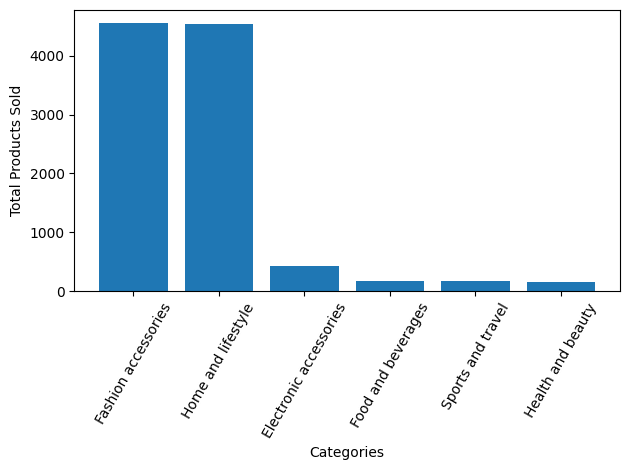

In [175]:
categories=df['category'].value_counts()


categories=categories.reset_index()


plt.bar(categories['category'],categories['count'])
plt.xlabel('Categories')
plt.ylabel('Total Products Sold')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [176]:
yearwisecount=df['year'].value_counts().reset_index()
yearwisecount.sort_values(by='year',inplace=True)

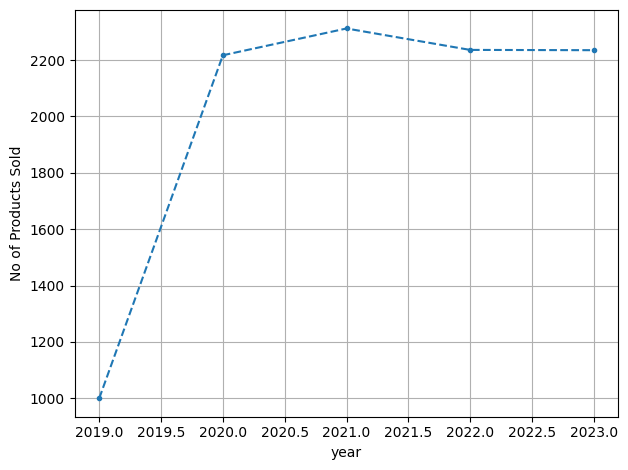

In [177]:
plt.plot(yearwisecount['year'],yearwisecount['count'],linestyle='--',marker='.')
plt.xlabel('year')
plt.ylabel('No of Products Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

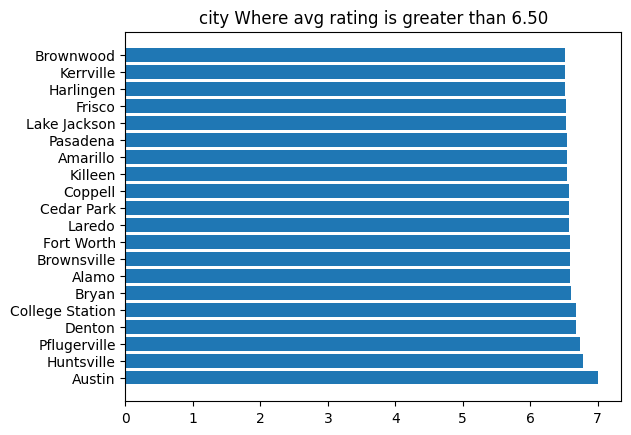

In [178]:
citywiseavgrating=df.groupby(['City'])['rating'].mean().reset_index()
citywiseavgrating.sort_values(by='rating',ascending=False,inplace=True)
filtered_citywise=citywiseavgrating[citywiseavgrating['rating']>6.50]



plt.barh(filtered_citywise['City'],filtered_citywise['rating'])
plt.title('city Where avg rating is greater than 6.50')
plt.show()


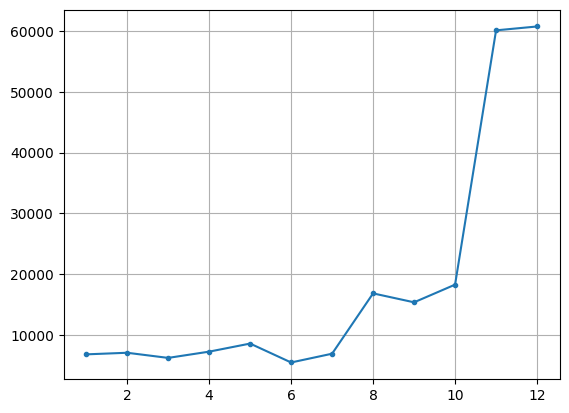

In [179]:
# month wise total sales in year 2020


filtered_year=df[df['year']==2020]
filtered_year=filtered_year.groupby('month')['totalprice'].sum().reset_index()



plt.plot(filtered_year['month'],filtered_year['totalprice'],marker='.')
plt.grid(True)
plt.tight_layout
plt.show()